## Data Visualization with Topic Survey   

In this lab, I created maps for different objectives. To do that, I part ways with Matplotlib and work with another Python visualization library, namely **Folium**. What is nice about **Folium** is that it was developed for the sole purpose of visualizing geospatial data. While other libraries are available to visualize geospatial data, such as **plotly**, they might have a cap on how many API calls you can make within a defined time frame. **Folium**, on the other hand, is completely free.

### About Project 

A survey was conducted to gauge an audience interest in different data science topics, namely:

1. Big Data (Spark / Hadoop)
2. Data Analysis / Statistics
3. Data Journalism
4. Data Visualization
5. Deep Learning
6. Machine Learning

The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey.

We can access the dataset through following link: https://cocl.us/datascience_survey_data

In [8]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
# load the dataset
df_survey = pd.read_csv('Topic_Survey_Assignment.csv')

In [10]:
# take a look into dataset
df_survey.head()

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


In [11]:
# rename the columns
df_survey.rename(columns={'Unnamed: 0':'Topic'}, inplace = True)
df_survey.set_index('Topic', inplace = True)
df_survey.head(6)

,Very interested,Somewhat interested,Not interested
Topic,,,
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [11]:
# sort the dataframe in descending order of *Very Interested**
df_survey.sort_values(['Very interested'], ascending=False, axis = 0, inplace=True)

To use the artist layer of Matplotlib to replicate the bar chart to visualize, we need the percentage of the respondents' interest in the different data science topics surveyed.

In [12]:
# convert dataframe values into percentage
df_survey = df_survey.divide(2233)
df_survey = df_survey.multiply(100)
df_survey = df_survey.round(2)

# take a look
df_survey.head()

,Very interested,Somewhat interested,Not interested
Topic,,,
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09


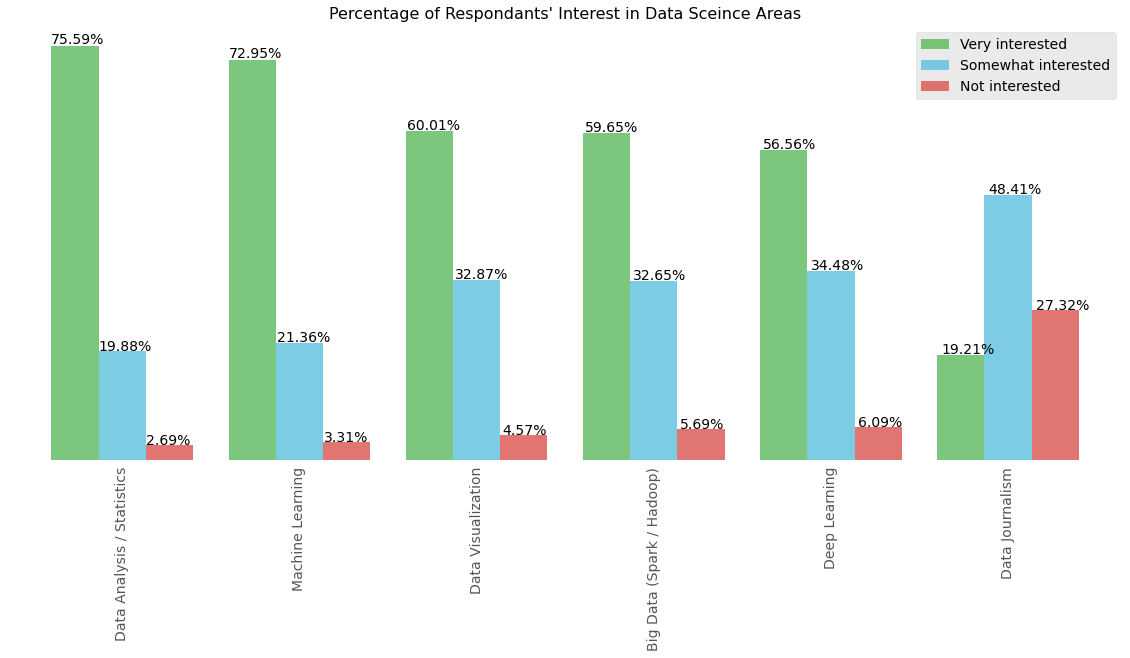

In [15]:
%matplotlib inline

# import libraries
import matplotlib as mpl

mpl.style.use('ggplot')

# color list for our 3 labels *legends* 
color_list = ['#5cb85c', '#5bc0de', '#d9534f']

ax = df_survey.plot.bar(figsize = (20,8), alpha = 0.8, width = 0.8, color = color_list)
ax.set_title("Percentage of Respondants' Interest in Data Sceince Areas", fontsize = 16)
legend = ax.legend(fontsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)
ax.set_xlabel('')

# keep percentage number on each of the bar
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%',
    (p.get_x() * 1.005, p.get_height() * 1.005), 
    fontsize = 14)

ax.set_facecolor('xkcd:white')
plt.tick_params(top = False, 
                bottom = False, 
                left = False,
                right = False, 
                labelleft = False,
                labelbottom = True)

In the final lab, I created a map with markers to explore crime rate in San Francisco, California. I created a Choropleth map to visualize crime in San Francisco.

Before starting building the map, let's restructure the data so that it is in the right format for the Choropleth map. Essentially, we need to create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes.

Based on the San Francisco crime dataset, we find that San Francisco consists of 10 main neighborhoods, namely:

1. Central,
2. Southern,
3. Bayview,
4. Mission,
5. Park,
6. Richmond,
7. Ingleside,
8. Taraval,
9. Northern, and,
10. Tenderloin

We can access the San Francisco dataset through following link: https://cocl.us/sanfran_crime_dataset

The dataset represents the total number of crimes in each neighbourhood.

In [13]:
# load the dataset
df_crime = pd.read_csv('Police_Department_Incidents-Previous_Year__2016.csv')

# take a look into dataset
df_crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [14]:
# re-arrange dataset
new = df_crime.PdDistrict.value_counts()
new_df = pd.DataFrame(data = new.values, index = new.index, columns=['Count'])
new_df = new_df.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])
new_df = new_df.reset_index()
new_df.rename({'index': 'Neighborhood'}, axis = 'columns', inplace = True)
new_df

,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28445
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


In the Choropleth maps lab, we need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco. 

We can get the file through following link: https://cocl.us/sanfran_geojson

In [15]:
# Choropleth map

!pip install folium
import folium

In [16]:
# SF area information
latitude = 37.77
longitude = -122.42

SF_json = r'san-francisco.geojson'

SF_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# choropleth map using the total immigration of each country to Canada from 1980 to 2013
SF_map.choropleth(geo_data = SF_json,
                  data = new_df,
                  columns = ['Neighborhood', 'Count'],
                  key_on = 'feature.properties.DISTRICT',
                  fill_color = 'YlOrRd', 
                  fill_opacity = 0.7, 
                  line_opacity = 0.2,
                  legend_name = 'Crime Rate in San Francisco')

# choropleth map
SF_map

/Users/kevilkhadka/opt/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
